# 1.Introducton

## Dataset description

The data pertains to the houses found in a given California district and some summary stats about them based on the 1990 census data. The following columns are used in the dataset :
1. `longitude`: A measure of how far west a house is; a higher value is farther west
2. `latitude`: A measure of how far north a house is; a higher value is farther north
3. `housingMedianAge`: Median age of a house within a block; a lower number is a newer building
4. `totalRooms`: Total number of rooms within a block
5. `totalBedrooms`: Total number of bedrooms within a block
6. `population`: Total number of people residing within a block
7. `households`: Total number of households, a group of people residing within a home unit, for a block
8. `medianIncome`: Median income for households within a block of houses (measured in tens of thousands of US Dollars)
9. `medianHouseValue`: Median house value for households within a block (measured in US Dollars)
10. `oceanProximity`: Location of the house with respect to the ocean or sea

## Questions for analysis

1. Which variables have statistically significant effects on median house values?
2. How do geographical factors influence median house values?
3. What role does housing age play in determining median house values?
4. What is the impact of median income on median house values?
5. How does proximity to the ocean influence median house values?
6. How well does the model fit the data?


The question will be addressed in depth in the data analysis and conclusion sections.

#### Import the relevant libraries

In [171]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

### Read and load the dataset

In [172]:
df = pd.read_csv('housing.csv')
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


# 2.Data Exploration and Cleaning

In [173]:
df.shape

(20640, 10)

 The dataset has `20640 rows` and `10 columns`

In [174]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
longitude,20640.0,-119.569704,2.003532,-124.3500,-121.8000,-118.4900,-118.01000,-114.3100
latitude,20640.0,35.631861,2.135952,32.5400,33.9300,34.2600,37.71000,41.9500
housing_median_age,20640.0,28.639486,12.585558,1.0000,18.0000,29.0000,37.00000,52.0000
total_rooms,20640.0,2635.763081,2181.615252,2.0000,1447.7500,2127.0000,3148.00000,39320.0000
total_bedrooms,20433.0,537.870553,421.385070,1.0000,296.0000,435.0000,647.00000,6445.0000
population,20640.0,1425.476744,1132.462122,3.0000,787.0000,1166.0000,1725.00000,35682.0000
households,20640.0,499.539680,382.329753,1.0000,280.0000,409.0000,605.00000,6082.0000
median_income,20640.0,3.870671,1.899822,0.4999,2.5634,3.5348,4.74325,15.0001
median_house_value,20640.0,206855.816909,115395.615874,14999.0000,119600.0000,179700.0000,264725.00000,500001.0000


In [175]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


Only the `ocean_proximity` column contain caterogorical data.

In [176]:
#Checking the dataset for missing values
df.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [177]:
print(f"The percentage of missing data in the dataset is {round(207 *100/20640, 2)} %")

The percentage of missing data in the dataset is 1.0 %


The `total_bedrooms` column has some missing data. Since the missing data is very small compared to the entire datset, we can drop it from the dataset.

In [178]:
#remove missing values and return the result after the removal
df.dropna(inplace=True)
df.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

# 3.Exploratory Data Analysis and Regression

We want to explore the relationship between the feature variables and the `median_house_value`, as that could help you gain insight on factors which determine the house value. We can model the relationship using multiple linear regression. To do this, we want to check if the model assumptions for linear regression can be made in this context. 

### Checking for Linearity 

We want to check for the lineaity between each feature and the target variable. A linear relationship means that a change in the target variable due to a one-unit change in the feature is constant, regardless of the value of feature variable.

If we fit a regression model to a non-linear dataset, it will fail to adequately capture the relationship in the data - resulting in a mathematically inappropriate model. To check for linearity, we can produce scatter plots of each feature against the target variable. The intuition here is that we are looking for obvious linear relationships

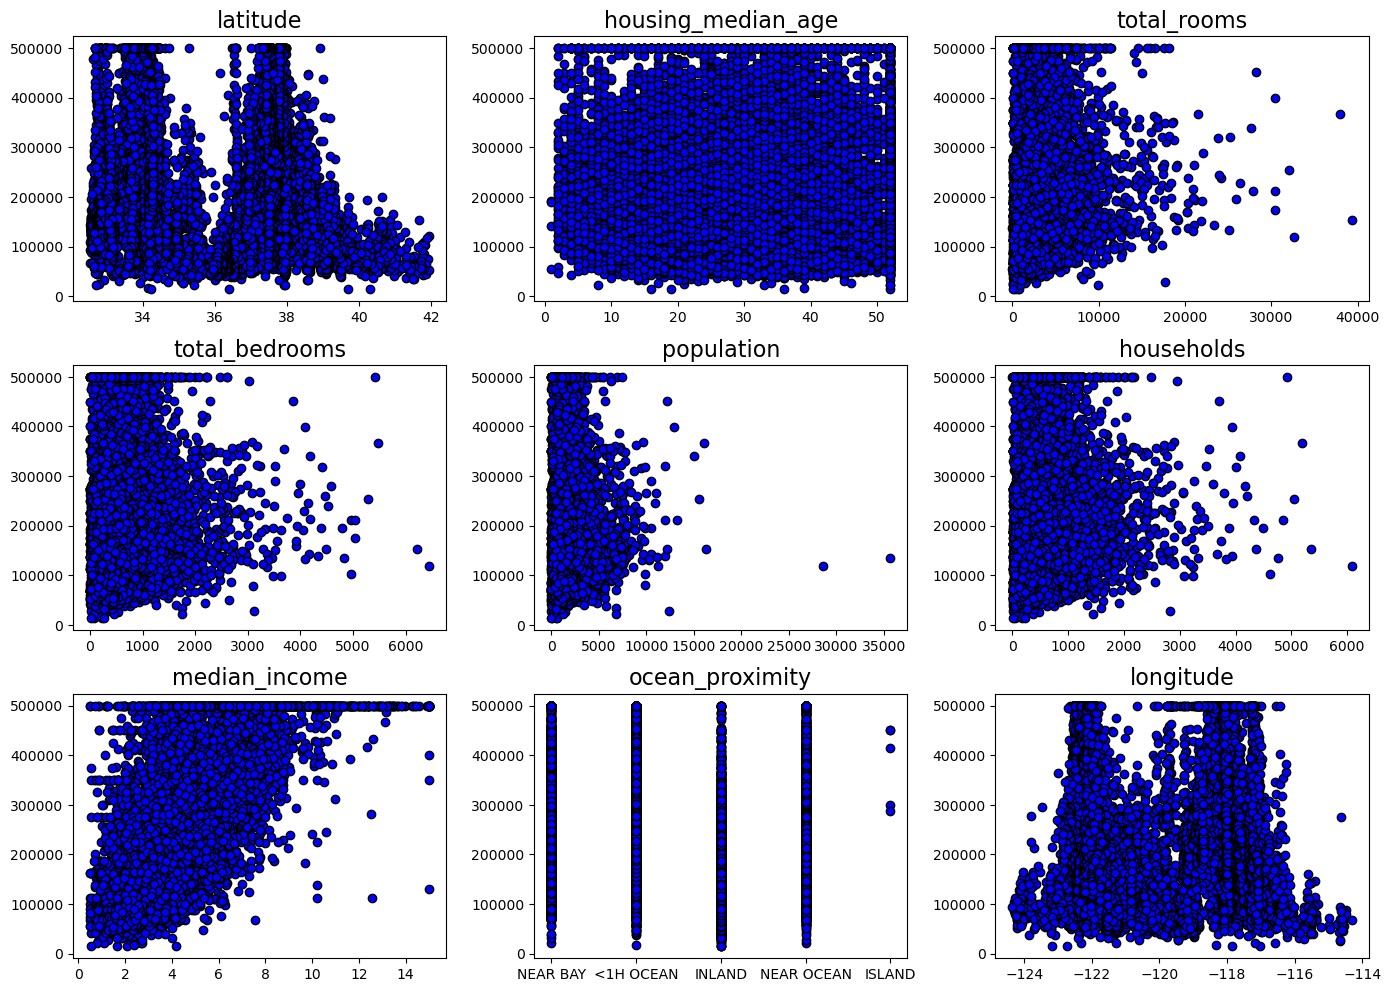

In [179]:
fig, axs = plt.subplots(3,3, figsize=(14,10),)
fig.subplots_adjust(hspace = 0.5, wspace=.2)
axs = axs.ravel()
df1 = df.drop('median_house_value', axis=1)

for index, column in enumerate(df1.columns):
    axs[index-1].set_title("{}".format(column),fontsize=16)
    axs[index-1].scatter(x=df[column],y=df['median_house_value'],color='blue',edgecolor='k')
    
fig.tight_layout(pad=1)

In [180]:
#Observation of linear relationship between the variables

## Checking for Normality 

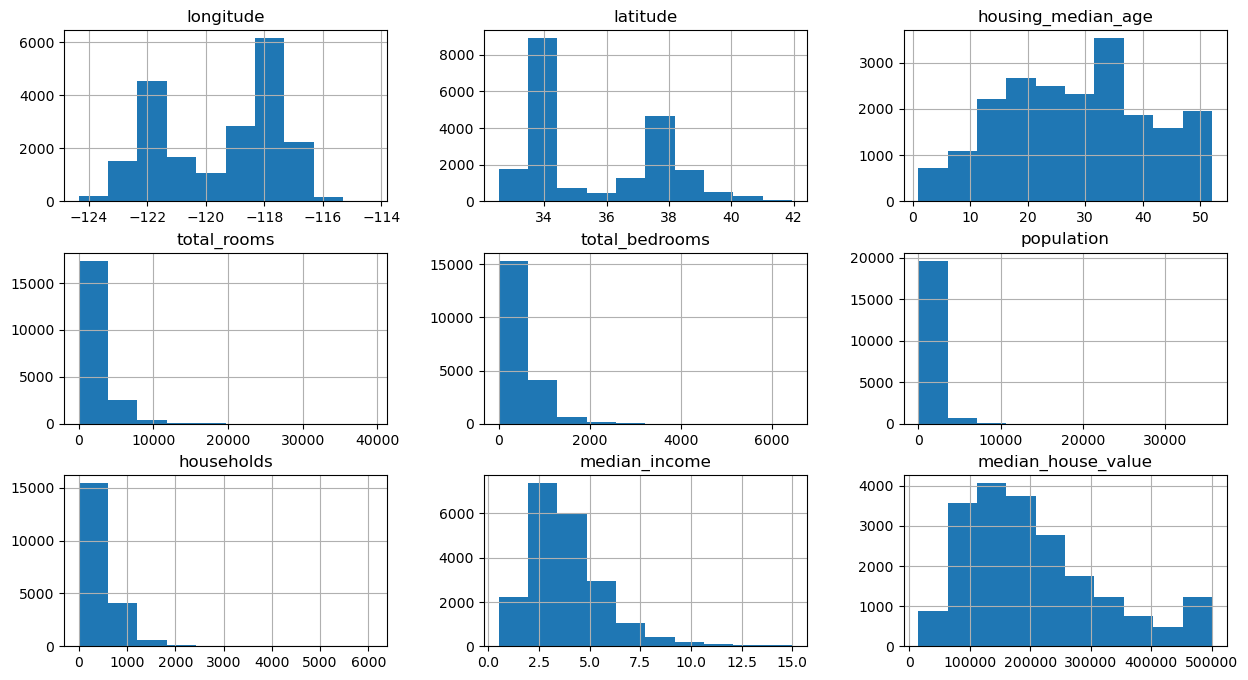

In [181]:
#plot the distribution of the data
df.hist(figsize=(15,8))
plt.show()

`total_rooms','total_bedrooms', 'population', 'households', 'median_income` do not exhibit a normal distribution from the plot above.

### Checking for multicollinearity

 a) <b>Columns with numerical data type</b>

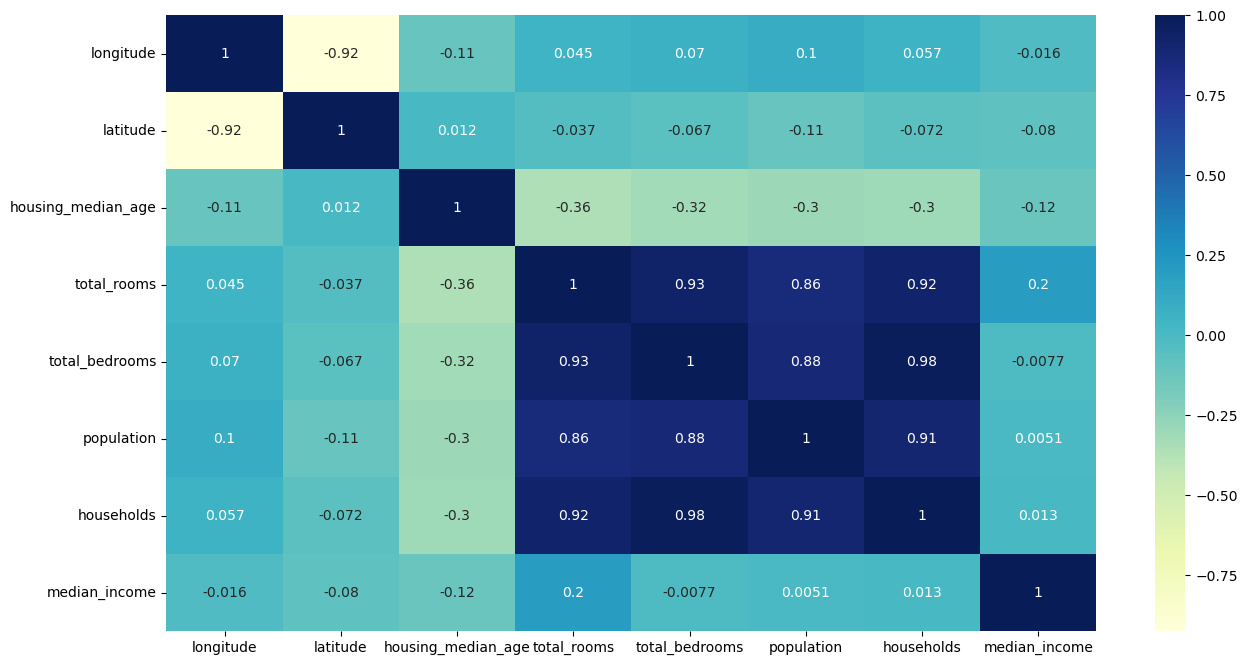

In [182]:
#get the correlation between the numeric data types
correlation_matrix = df1.select_dtypes(include='number').corr()

#plot the heatmap for the correlation
plt.figure(figsize=(15,8))
sns.heatmap(correlation_matrix, annot=True, cmap='YlGnBu')
plt.show()

What do we notice about the correaltion between the numerical predictor variables? Well, this question will be answered after we have all the varibles taken into account.

The above heatmap plots the correlation between columns with numeric values. However, the `ocean_proximity` column contains categorical data. Use the Pandas method `get_dummies()` for this one-hot encoding.


 b) <b>All the columns after one-hot encoding</b>

In [183]:
df1['ocean_proximity'].value_counts()


ocean_proximity
<1H OCEAN     9034
INLAND        6496
NEAR OCEAN    2628
NEAR BAY      2270
ISLAND           5
Name: count, dtype: int64

In [184]:
# change the categorical data to numeric
df_dummies = pd.get_dummies(df, columns=['ocean_proximity'],dtype='int',drop_first=True)
df_dummies.columns = [col.replace(" ","_") for col in df_dummies.columns] 
df_dummies.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR_BAY,ocean_proximity_NEAR_OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0,0,1,0


### visualise the correlation heatmap for all the predictor variables

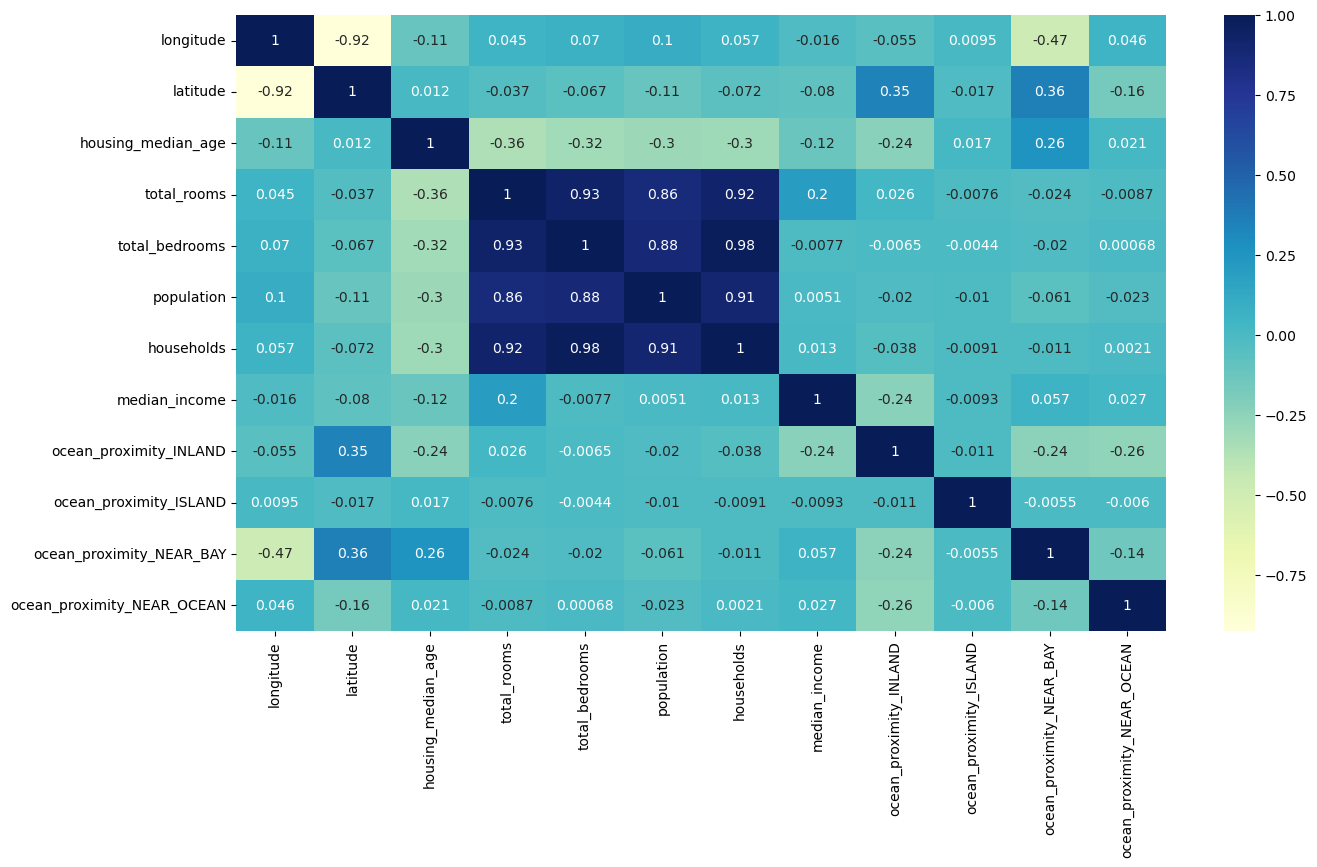

In [185]:
#exclude the target variable when checking for collineaity
df1 = df_dummies.drop('median_house_value' ,axis=1)

correl_matrix = df1.corr()

plt.figure(figsize=(15,8))
sns.heatmap(correl_matrix, annot=True, cmap='YlGnBu')
plt.show()

The above heatmap plots the relationship between all the predictor variables.

Based on the heatmap, we can see that there exist a strong positive correlation between the following variables: 
    1)`households` and `total_bedrooms` 
    2) `population` and `households`
    3) `total_bedrooms` and `population` 
    4)`total_bedrooms` and `total_rooms`

There exists a strong negative correlation between `latitude and longitude`.

## Fitting the model using statsmodels.OLS

In [186]:
import statsmodels.formula.api as sm

### Generating the regression string
We generate an appropriate string to feed to the method when we wish to fit the model.

In [187]:
df2 = df_dummies.copy()

y_name = 'median_house_value'
X_names = [col for col in df2.columns if col != y_name]
formula_str = y_name+" ~ "+" + ".join(X_names);
formula_str

'median_house_value ~ longitude + latitude + housing_median_age + total_rooms + total_bedrooms + population + households + median_income + ocean_proximity_INLAND + ocean_proximity_ISLAND + ocean_proximity_NEAR_BAY + ocean_proximity_NEAR_OCEAN'

### <b>Construct and fit the model</b>

In [188]:
#fit the model using the dummy dataframe
model=sm.ols(formula=formula_str, data=df2)
fitted_model = model.fit()

#output the fitted model
print(fitted_model.summary())

                            OLS Regression Results                            
Dep. Variable:     median_house_value   R-squared:                       0.646
Model:                            OLS   Adj. R-squared:                  0.646
Method:                 Least Squares   F-statistic:                     3112.
Date:                Fri, 15 Mar 2024   Prob (F-statistic):               0.00
Time:                        16:00:37   Log-Likelihood:            -2.5655e+05
No. Observations:               20433   AIC:                         5.131e+05
Df Residuals:                   20420   BIC:                         5.132e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept           

### <b> Interpreting the OLS Regression Results</b>
The <b>R-squared</b> value indicates that approximately 64.6% of the variance in the median house value is explained by the predictor variables included in the model. This suggests that the model provides a reasonable fit to the data.
The adjusted R-squared is also approximately 64.6%, indicating that adding more predictor variables did not significantly improve the model's explanatory power.

The large condition number suggests strong multicollinearity, which may affect the stability and interpretability of the coefficients.


 ## Insights

1. **Which variables have statistically significant effects on median house values?**
   - Variables with coefficients that have p-values less than the significance level (typically 0.05) are considered statistically significant predictors of median house values.

2. **How do geographical factors influence median house values?**
   - The coefficients for longitude and latitude suggest that houses located farther west or north tend to have lower median values, indicating a spatial effect on housing prices.

3. **What role does housing age play in determining median house values?**
   - The positive coefficient for housing median age indicates that newer buildings within a block are associated with higher median house values.

4. **What is the impact of median income on median house values?**
   - The substantial coefficient for median income indicates that areas with higher median incomes tend to have higher median house values.

5. **How does proximity to the ocean influence median house values?**
   - The coefficients for different categories of ocean proximity suggest that houses located inland or near a bay generally have lower median values compared to those near an ocean or on an island.

6. **How well does the model fit the data?**
   - The R-squared value of 0.646 indicates that approximately 64.6% of the variance in median house values is explained by the included variables, indicating a good overall fit of the model to the data.





## 4.Conclusions 

Overall, the model demonstrates a good fit with an R-squared value of 0.646, indicating that approximately 64.6% of the variance in median house values is explained by the included variables. These findings provide valuable insights for stakeholders in the real estate industry, policymakers, and urban planners, aiding in better understanding the factors driving median house values in a given area.

### Limitations

The analysis is focused on using OLS regression only.